<a href="https://colab.research.google.com/github/iamajarpit/hand_gestures_detection/blob/main/Gestures.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input

# Paths

from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Data augmentation and preprocessing
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/hand gestures.v2-release.tensorflow/train',
    target_size=(128, 128),  # Ensure target size matches input shape of the model
    batch_size=32,
    class_mode='categorical'
)

validation_generator = val_datagen.flow_from_directory(
    '/content/drive/MyDrive/hand gestures.v2-release.tensorflow/valid',
    target_size=(128, 128),  # Ensure target size matches input shape of the model
    batch_size=32,
    class_mode='categorical'
)



Found 2628 images belonging to 2 classes.
Found 345 images belonging to 2 classes.


In [ ]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout

# Load the pre-trained model without the top layer
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(128, 128, 3))

# Freeze the base model
base_model.trainable = False

# Build the model
model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(1024, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    Dropout(0.5),
    Dense(train_generator.num_classes, activation='softmax')  # Ensure the number of output neurons matches the number of classes
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [ ]:
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=validation_generator
)


Epoch 1/10
83/83 [==============================] - 74s 852ms/step - loss: 1.0237 - accuracy: 0.9479 - val_loss: 3.4890 - val_accuracy: 0.4609
Epoch 2/10
83/83 [==============================] - 67s 809ms/step - loss: 0.6454 - accuracy: 0.9817 - val_loss: 4.0322 - val_accuracy: 0.4580
Epoch 3/10
83/83 [==============================] - 70s 845ms/step - loss: 0.4782 - accuracy: 0.9833 - val_loss: 3.8411 - val_accuracy: 0.4783
Epoch 4/10
83/83 [==============================] - 66s 799ms/step - loss: 0.4314 - accuracy: 0.9734 - val_loss: 5.2780 - val_accuracy: 0.4580
Epoch 5/10
83/83 [==============================] - 68s 822ms/step - loss: 0.3377 - accuracy: 0.9836 - val_loss: 3.8694 - val_accuracy: 0.4841
Epoch 6/10
83/83 [==============================] - 68s 819ms/step - loss: 0.2728 - accuracy: 0.9878 - val_loss: 2.4564 - val_accuracy: 0.5362
Epoch 7/10
83/83 [==============================] - 68s 814ms/step - loss: 0.2461 - accuracy: 0.9871 - val_loss: 5.1215 - val_accuracy: 0.4609

In [ ]:
for data_batch, labels_batch in train_generator:
    print("data batch shape:", data_batch.shape)
    print("labels batch shape:", labels_batch.shape)
    break


data batch shape: (32, 128, 128, 3)
labels batch shape: (32, 2)


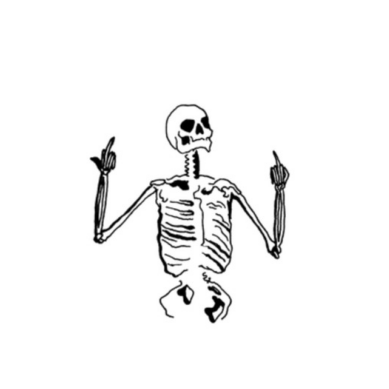

1/1 [==============================] - 1s 1s/step
Prediction: remove


In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import img_to_array, load_img
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
import numpy as np
import matplotlib.pyplot as plt

# Load the trained model
model_save_path = '/mnt/data/middle_finger_detection_model.h5'
model = load_model(model_save_path)

def preprocess_image(image_path):
    image = load_img(image_path, target_size=(224, 224))
    image = img_to_array(image)
    image = np.expand_dims(image, axis=0)
    image = preprocess_input(image)
    return image

def predict_image(image_path, threshold=0.5):
    try:
        image = preprocess_image(image_path)
        prediction = model.predict(image)
        is_middle_finger = prediction[0][0] > threshold
        result = 'remove' if is_middle_finger else 'keep'
    except Exception as e:
        print(f"Error in prediction: {e}")
        result = 'keep'
    return result

def show_image(image_path):
    image = load_img(image_path)
    plt.imshow(image)
    plt.axis('off')
    plt.show()

# Example of checking an image
example_image_path = '/content/artworks-0zUqQbPEoEwj-0-t500x500.jpeg'
show_image(example_image_path)
result = predict_image(example_image_path)
print(f'Prediction: {result}')


In [ ]:
model.save('my_model.h5')


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np
import os

# Load the trained model
model_path = '/content/my_model.h5'  # Update the path to your model
model = load_model(model_path)

# Function to preprocess input image
def preprocess_image(img_path, target_size=(224, 224)):
    img = image.load_img(img_path, target_size=target_size)
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    img_array /= 255.0  # Normalize to [0, 1]
    return img_array

# Function to predict middle finger gesture
def detect_middle_finger(img_path):
    preprocessed_img = preprocess_image(img_path)
    prediction = model.predict(preprocessed_img)
    predicted_class = np.argmax(prediction, axis=1)[0]
    return predicted_class, prediction

# Function to evaluate model on a directory of images
def evaluate_model_on_directory(directory_path):
    results = []
    for filename in os.listdir(directory_path):
        if filename.endswith(('.png', '.jpg', '.jpeg')):
            img_path = os.path.join(directory_path, filename)
            predicted_class, prediction = detect_middle_finger(img_path)
            results.append((filename, predicted_class, prediction))
    return results

# Example usage
directory_path = 'path_to_your_test_images'  # Update the path to your test images directory

# Evaluate the model on the directory of images
results = evaluate_model_on_directory(directory_path)

# Output results with detailed predictions
for filename, predicted_class, prediction in results:
    print(f"{filename} - Predicted Class: {predicted_class}, Prediction: {prediction}")
    if predicted_class == 1:  # Assuming '1' is the class for middle finger gesture
        print(f"{filename} contains a middle finger gesture.")
    else:
        print(f"{filename} does not contain a middle finger gesture.")
